# Homework 5

## Image Processing and Pixel Classification


This week's homework is about classifying pixels in a sattelite image:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.io import loadmat
import pandas as pd

The image below a sattelite image of Salinas Valley, California of 512 pixels by 217 pixels where individual values tells us what is planted in that specific area: 

0         Brocoli_green_weeds_1 
1         Brocoli_green_weeds_2 
2                        Fallow 
3             Fallow_rough_plow 
4                 Fallow_smooth 
5                       Stubble 
6                        Celery 
7              Grapes_untrained 
8          Soil_vinyard_develop 
9     Corn_senesced_green_weeds 
10          Lettuce_romaine_4wk 
11          Lettuce_romaine_5wk 
12          Lettuce_romaine_6wk 
13          Lettuce_romaine_7wk 
14            Vinyard_untrained 
15     Vinyard_vertical_trellis 
Name: Class , dtype: object

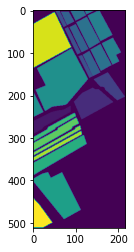

In [10]:
salinas_gt = loadmat('data/Salinas_gt.mat')['salinas_gt']
salinas = loadmat('data/Salinas.mat')['salinas']
salinas_classes = pd.read_csv('data/Salinas_classes.csv',sep='\t')['Class ']
plt.imshow(salinas_gt)
salinas_classes

The main data `salinas` is a tensor (i.e. a multi-dimensional array) of shape (512,217,224). This means we have 224 different greyscale images taken in different wavelengths. Below, I am going to reshape the data into a matrix of shape $(512\cdot 217,224)$ so that each row is a flattened matrix.

In [11]:
salinas

array([[[290, 381, 585, ...,  11,  17,  10],
        [290, 381, 519, ...,  11,  15,  16],
        [290, 381, 585, ...,  11,  11,  12],
        ...,
        [373, 482, 594, ...,   4,   0,   4],
        [373, 482, 659, ...,   0,   5,   0],
        [305, 393, 655, ...,   1,  -3,  -2]],

       [[379, 400, 600, ...,  11,  15,   8],
        [308, 400, 535, ...,  15,  13,   8],
        [379, 483, 535, ...,   5,  15,   8],
        ...,
        [376, 477, 590, ...,   0,  -5,   1],
        [376, 477, 590, ...,   0,  13,   1],
        [305, 393, 655, ...,   1,  -3,  -2]],

       [[369, 495, 604, ...,   9,  17,   4],
        [298, 411, 604, ...,   5,  13,   6],
        [298, 411, 670, ...,   7,  13,  10],
        ...,
        [447, 468, 664, ...,   7,   0,   1],
        [305, 468, 664, ...,   7,   2,   1],
        [447, 384, 664, ...,   1,   4,   3]],

       ...,

       [[379, 383, 540, ...,   5,   9,   4],
        [308, 383, 540, ...,   5,   5,   2],
        [379, 383, 540, ...,  -2,   7,   4

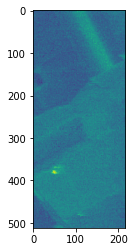

In [12]:
scaler = MinMaxScaler()
salinas_reshaped = scaler.fit_transform(salinas.reshape((512*217,224)))
salinas_gt_reshaped = salinas_gt.reshape(512*217)

plt.imshow(salinas_reshaped[:,0].reshape((512,217)))

## Question

Each pixel belongs to a specific class given by `salinas_classes`.  Form a 

1. Linear Discriminant Analysis model,
2. Support Vector Machines model,
3. Logistic Regression model,
4. Decision Tree model,
5. Boosted Tree model

to predict which pixel belongs to which class. Train and test your model and evaluate your accuracy together with a confidence interval.

In [55]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy.stats import t

In [15]:
salinas_gt

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [16, 16, 16, ...,  0,  0,  0],
       [16, 16, 16, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

## 1. LDA Model: 

In [51]:
accuracies=[]
N=20
for i in range(N):
    accuracy = doExperiment2(salinas_reshaped,salinas_gt_reshaped,LinearDiscriminantAnalysis())
    accuracies.append(accuracy)

accuracies=np.array(accuracies)
t.interval(0.95,N-1,loc=accuracies.mean(),scale=accuracies.var())

(0.5728300623625535, 0.5731938890902406)

## 2. Support Vectore Machine Model:

In [56]:
def doExperiment(xs,ys,model,ts=0.25):
    xtrain,xtest,ytrain,ytest = train_test_split(xs,ys,test_size=ts)
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    acc_score=accuracy_score(ytest, pred)
    return acc_score

In [57]:
from sklearn.svm import LinearSVC, SVC
accuracies=[]
N=20
for i in range(N):
    accuracy = doExperiment2(salinas_reshaped,salinas_gt_reshaped,SVC(max_iter=500))
    accuracies.append(accuracy)

accuracies=np.array(accuracies)
t.interval(0.95,N-1,loc=accuracies.mean(),scale=accuracies.var())


/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing 

(-0.19377175275561334, -0.1664488556545803)

As we consider the accuracy values, a predictive model can not be established in SVM.

## 3. Logistic Regression Model:

In [46]:
def doExperiment2(xs,ys,model,ts=0.2):
    xtrain,xtest,ytrain,ytest = train_test_split(xs,ys,test_size=ts)
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    r2 = r2_score(ytest,pred)
    return r2

At first, I wanted to construct a model with default configurations of LR.

In [48]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LogisticRegression
accuracies=[]
N=20
for i in range(N):
    accuracy = doExperiment2(salinas_reshaped,salinas_gt_reshaped,LogisticRegression(solver='saga',multi_class='auto'))
    accuracies.append(accuracy)

accuracies=np.array(accuracies)
t.interval(0.95,N-1,loc=accuracies.mean(),scale=accuracies.var())


/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages

(0.4101720255043412, 0.4108839227226897)

But, in default configurations, accuracy values are not good and model is not good at all.
Then, I wanted to try it with more specialized configurations below:

In [58]:
def doExperiment2_2(xs,ys,model,ts=0.2):
    X_train, X_test, y_train, y_test = train_test_split(xs,ys,test_size=ts)
    scaler = StandardScaler().fit(X_train)
    tmp = scaler.transform(X_train)
    X_train = tmp
    tmp = scaler.transform(X_test)
    X_test = tmp
    model = LogisticRegression(max_iter=15,multi_class='multinomial',
                               solver='saga', warm_start=True,
                               penalty='elasticnet', l1_ratio=0.3)
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In regression models, score calculates R2 value in default.

In [59]:
from sklearn.linear_model import LogisticRegression
accuracies=[]
N=20
for i in range(N):
    accuracy = doExperiment2(salinas_reshaped,salinas_gt_reshaped,LogisticRegression(solver='saga',multi_class='auto'))
    accuracies.append(accuracy)

accuracies=np.array(accuracies)
t.interval(0.95,N-1,loc=accuracies.mean(),scale=accuracies.var())


/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages

(0.40974716566117403, 0.41020118633990305)

## 4. Decision Tree Model: 

In [40]:
from sklearn.tree import DecisionTreeClassifier
def doExperiment(xs,ys,model,ts=0.25):
    xtrain,xtest,ytrain,ytest = train_test_split(xs,ys,test_size=ts)
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    acc_score=accuracy_score(ytest, pred)
    return acc_score
def visualizeR(dataset):
    plt.plot('max_depth','acc_gini', data=dataset, label='gini')
    plt.plot('max_depth','acc_entropy', data=dataset, label='entropy')
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')
    plt.legend()

In decision tree, I firstly wanted to find the optimal depth and criterion with trials as below. 

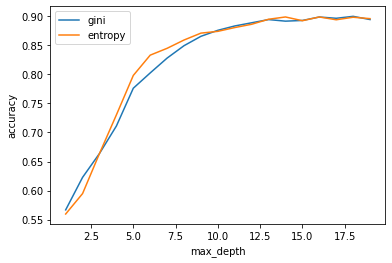

In [41]:
max_depth = []
acc_gini = []
acc_entropy = []
#X_train, X_test, y_train, y_test = train_test_split(salinas_reshaped,salinas_gt_reshaped,test_size=0.8)
for i in range(1,20):
    accuracy=doExperiment(salinas_reshaped,salinas_gt_reshaped,DecisionTreeClassifier(criterion='gini',max_depth=i))
    acc_gini.append(accuracy)
    
    accuracy=doExperiment(salinas_reshaped,salinas_gt_reshaped,DecisionTreeClassifier(criterion='entropy',max_depth=i))
    acc_entropy.append(accuracy)

    max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
                  'acc_entropy':pd.Series(acc_entropy),
                  'max_depth':pd.Series(max_depth)})
visualizeR(d)

There was no difference between criterions and accuracy is maximized around max_depth=17. 
Thus, the model is set with these configurations:

In [42]:
accuracies=[]
N=20
for i in range(N):
    accuracy=doExperiment(salinas_reshaped,salinas_gt_reshaped,DecisionTreeClassifier(criterion='entropy',max_depth=17))
    accuracies.append(accuracy)
acc=np.array(accuracies)
t.interval(0.95,N-1,acc.mean(),acc.var())

(0.8974751544021261, 0.8974917234780583)

## 5. Boosted Tree Model:

In boosted tree, I made a model with AdaBoostClassifier first.

In [52]:
accuracies=[]
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(salinas_reshaped,salinas_gt_reshaped,test_size=0.8)
    model1 = AdaBoostClassifier()
    model1.fit(X_train,y_train)
    acc=accuracy_score(model1.predict(X_test),y_test)
    accuracies.append(acc)
acc=np.array(accuracies)
N=20
t.interval(0.95,N-1,acc.mean(),acc.var())

(0.5266083062042184, 0.5286828598099123)

But the accuracy of the model was bad in this model.
Then, I wanted to use Gradient Boosting Classifier and I wanted to optimize its depth value with a heuristic. 

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
def doExperiment(xs,ys,model,ts=0.25):
    xtrain,xtest,ytrain,ytest = train_test_split(xs,ys,test_size=ts)
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    acc_score=accuracy_score(ytest, pred)
    return acc_score
def visualizeR_2(dataset):
    plt.plot('max_depth','acc_values', data=dataset, label='score')
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')
    plt.legend()
def depthSelect(accuracy_val):
    depth=accuracy_val.index(max(accuracy_val))+1
    print('Maximum score in Gradient Boosting Tree: ', max(accuracy_val))
    print('For the maximum score, max_depth: ',accuracy_val.index(max(accuracy_val))+1)
    return depth

In [66]:
max_depth = []
acc_values = []
for i in range(1,50):
    accuracy=doExperiment(salinas_reshaped,salinas_gt_reshaped,GradientBoostingClassifier(loss='deviance',criterion='friedman_mse',max_depth=i))
    acc_values.append(accuracy)
    max_depth.append(i)

d = pd.DataFrame({'acc_values':pd.Series(acc_values),'max_depth':pd.Series(max_depth)})
visualizeR_2(d)

KeyboardInterrupt: 

After more than one day of executing, I didn't wait to complete 50 iterations in order to follow deadline.

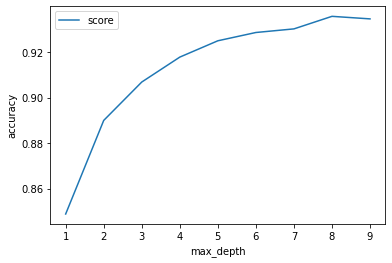

In [67]:
d = pd.DataFrame({'acc_values':pd.Series(acc_values),'max_depth':pd.Series(max_depth)})
visualizeR_2(d)

In [69]:
depth = depthSelect(acc_values)

Maximum score in Gradient Boosting Tree:  0.9356278801843319
For the maximum score, max_depth:  8


In [70]:
accuracies=[]
N=3
for i in range(N):
    accuracy=doExperiment(salinas_reshaped,salinas_gt_reshaped,GradientBoostingClassifier(loss='deviance',criterion='friedman_mse',max_depth=depth))
    accuracies.append(accuracy)
acc=np.array(accuracies)
t.interval(0.95,N-1,acc.mean(),acc.var())

KeyboardInterrupt: 

In order to follow the deadline, I have to stop the code but the mean of accuracy score is estimated about 0.935.

As a final word, Decision Tree and Gradient Boosting Classifiers performed well on this study.  